<a href="https://colab.research.google.com/github/DMMutua/DMMutua/blob/main/Using_Logistic_Regression_to_Predict_Fires_in_an_Algerian_Forest_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  In this ```
google.colab
``` Notebook, I use an Algerian Dataset detailing forest fires in two Regions Only (Bejaia and Sidi Bel-abbes ) 

 The data details components of the Fire Weather Index (FWI) and instances of Forest Fires each day from June 2012 to September 2022.

  In particular, I use logistic regression for predictive analytics to investigate Trends in data that are more common when forest fires occur. 

 Unfortunately, the binomial Logistic regression models build detected perfect separation on the data set. This means that there could not be results generated as more than one of the variables are distict in cases with fire or no fires in Algerian Forest. 
 
 However, the notebook can be used as a guide to building a binomial logistic model for a different dataset.

In [ ]:
#Loading the dataset
from google.colab import files
files.upload()


Saving Algerian_forest_fires_dataset.csv to Algerian_forest_fires_dataset.csv


{'Algerian_forest_fires_dataset.csv': b'Index,Day,Month,Region,Temperature, RH, Ws,Rain ,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Fire Instance\r\n1,1,June,Bejaia,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0\r\n2,2,June,Bejaia,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0\r\n3,3,June,Bejaia,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0\r\n4,4,June,Bejaia,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0\r\n5,5,June,Bejaia,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0\r\n6,6,June,Bejaia,31,67,14,0,82.6,5.8,22.2,3.1,7,2.5,fire,1\r\n7,7,June,Bejaia,33,54,13,0,88.2,9.9,30.5,6.4,10.9,7.2,fire,1\r\n8,8,June,Bejaia,30,73,15,0,86.6,12.1,38.3,5.6,13.5,7.1,fire,1\r\n9,9,June,Bejaia,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire,0\r\n10,10,June,Bejaia,28,79,12,0,73.2,9.5,46.3,1.3,12.6,0.9,not fire,0\r\n11,11,June,Bejaia,31,65,14,0,84.5,12.5,54.3,4,15.8,5.6,fire,1\r\n12,12,June,Bejaia,26,81,19,0,84,13.8,61.4,4.8,17.7,7.1,fire,1\r\n13,13,June,Bejaia,27,84,21,1.2,50,6.7,17,0.5,6.7,0.2,not fire,0\r\n14,14

Importing Necessary Libraries

In [ ]:
from seaborn import matrix
import matplotlib as mpl
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

Initial Data Exploration;

In [ ]:
#Converting data into dataframe
ff = pd.read_csv("Algerian_forest_fires_dataset.csv", index_col='Index', header=0, sep=",")

#Getting first few entries of the df
ff.head()


,Day,Month,Region,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Fire Instance
Index,,,,,,,,,,,,,,,
1,1,June,Bejaia,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
2,2,June,Bejaia,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
3,3,June,Bejaia,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
4,4,June,Bejaia,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
5,5,June,Bejaia,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [ ]:
#Getting Last few Entries of the df
ff.tail()

,Day,Month,Region,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Fire Instance
Index,,,,,,,,,,,,,,,
240,26,September,Sidi-Bel Abbes,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
241,27,September,Sidi-Bel Abbes,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,0
242,28,September,Sidi-Bel Abbes,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,0
243,29,September,Sidi-Bel Abbes,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,0
244,30,September,Sidi-Bel Abbes,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,0


In [ ]:
#Summary of the dataset
ff.info()
ff = ff.dropna()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 1 to 244
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Day            244 non-null    int64  
 1   Month          244 non-null    object 
 2   Region         244 non-null    object 
 3   Temperature    244 non-null    int64  
 4    RH            244 non-null    int64  
 5    Ws            244 non-null    int64  
 6   Rain           244 non-null    float64
 7   FFMC           244 non-null    float64
 8   DMC            244 non-null    float64
 9   DC             244 non-null    float64
 10  ISI            244 non-null    float64
 11  BUI            244 non-null    float64
 12  FWI            244 non-null    float64
 13  Classes        244 non-null    object 
 14  Fire Instance  244 non-null    int64  
dtypes: float64(7), int64(5), object(3)
memory usage: 30.5+ KB


In [ ]:
#Creating a backup dataframe
ffcopy = ff.copy()

**Model Buiding:**

In [ ]:
#Test-Train Split
from sklearn.model_selection import train_test_split

#Assigning Feature Variables to X
X = ff.drop(['Month', 'Day', 'Region', 'Classes','ISI', 'BUI'], axis=1)
del X['Rain ']
X.head()

,Temperature,RH,Ws,FFMC,DMC,DC,FWI,Fire Instance
Index,,,,,,,,
1,29,57,18,65.7,3.4,7.6,0.5,0
2,29,61,13,64.4,4.1,7.6,0.4,0
3,26,82,22,47.1,2.5,7.1,0.1,0
4,25,89,13,28.6,1.3,6.9,0.0,0
5,27,77,16,64.8,3.0,14.2,0.5,0


In [ ]:
#Putting response variable to y
y = ff['Fire Instance']
y.head()


Index
1    0
2    0
3    0
4    0
5    0
Name: Fire Instance, dtype: int64

In [ ]:
#Splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=40 )

In [ ]:
X_train.head()

,Temperature,RH,Ws,FFMC,DMC,DC,FWI,Fire Instance
Index,,,,,,,,
27,34,53,18,89.0,21.6,80.3,15.0,1
168,31,83,17,84.5,19.4,33.1,7.3,1
223,30,80,15,83.1,7.9,34.5,3.7,1
122,25,78,14,45.0,1.9,7.5,0.1,0
230,33,26,13,93.9,21.2,59.2,19.3,1


In [ ]:
y_train.head()

Index
27     1
168    1
223    1
122    0
230    1
Name: Fire Instance, dtype: int64

Now, Investigating Correlation in the Training dataset;

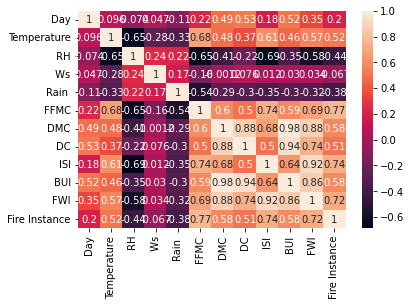

In [ ]:
#Correlation heatmap; 

sns.heatmap(ff.corr(),annot = True)


Scaling the Variables;

The training Model;


In [ ]:
# Importing libraries necessary for the model
import statsmodels.api as sm

#First Logistic Regression Model


logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


PerfectSeparationError: ignored